In [8]:
import spherical_inr as sph
import torch 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cartopy.crs as ccrs


In [9]:
hnet = sph.HerglotzNet( 
    L = 5,
    output_dim=1,
    mlp_sizes = 3*[100],
    mlp_kwargs={
        "omega0": 5.0,
    }
)

In [10]:
siren = sph.SirenNet(
    num_atoms = 10**2,
    input_dim=2,
    output_dim=1, 
    mlp_sizes= 3*[100],
    mlp_kwargs={
        "omega0": 5.0,
    }
)

In [11]:
sph_siren = sph.SphericalSirenNet(
    L = 10,
    output_dim =1,
    mlp_sizes= 3*[100],
    mlp_kwargs={
        "omega0": 5.0,
    }
)

In [12]:
def target(theta, phi):
    return torch.sin(3*theta) * torch.cos(5*phi)

In [13]:
# Generate a grid of theta and phi values
theta = torch.linspace(0, torch.pi, 100)
phi = torch.linspace(0, 2 * torch.pi, 100)
theta, phi = torch.meshgrid(theta, phi, indexing='ij')

xtrain = torch.stack([theta, phi], dim=-1).reshape(-1, 2)
ytrain = target(theta, phi).reshape(-1, 1)

In [14]:
num_epochs = 1000
optimizer = torch.optim.Adam(hnet.parameters(), lr=1e-3)

for epoch in range(num_epochs):
    optimizer.zero_grad()
    ypred = hnet(xtrain)
    loss = torch.mean((ypred - ytrain)**2)
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss {loss.item():.5f}")

Epoch 0, Loss 0.25513
Epoch 100, Loss 0.00555
Epoch 200, Loss 0.00133
Epoch 300, Loss 0.00067
Epoch 400, Loss 0.00049
Epoch 500, Loss 0.00055
Epoch 600, Loss 0.00034
Epoch 700, Loss 0.00029
Epoch 800, Loss 0.00026
Epoch 900, Loss 0.00023


In [15]:
num_epochs = 1000
optimizer = torch.optim.Adam(siren.parameters(), lr=1e-3)

for epoch in range(num_epochs):
    optimizer.zero_grad()
    ypred = siren(xtrain)
    loss = torch.mean((ypred - ytrain)**2)
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss {loss.item():.5f}")

Epoch 0, Loss 0.27890
Epoch 100, Loss 0.22790
Epoch 200, Loss 0.04279
Epoch 300, Loss 0.00176
Epoch 400, Loss 0.00082
Epoch 500, Loss 0.00033
Epoch 600, Loss 0.00024
Epoch 700, Loss 0.00017
Epoch 800, Loss 0.00013
Epoch 900, Loss 0.00010


In [16]:
num_epochs = 1000
optimizer = torch.optim.Adam(sph_siren.parameters(), lr=1e-3)

for epoch in range(num_epochs):
    optimizer.zero_grad()
    ypred = sph_siren(xtrain)
    loss = torch.mean((ypred - ytrain)**2)
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss {loss.item():.5f}")

Epoch 0, Loss 0.27216
Epoch 100, Loss 0.00172
Epoch 200, Loss 0.00074
Epoch 300, Loss 0.00043
Epoch 400, Loss 0.00028
Epoch 500, Loss 0.00019
Epoch 600, Loss 0.00014
Epoch 700, Loss 0.00011
Epoch 800, Loss 0.00009
Epoch 900, Loss 0.00013


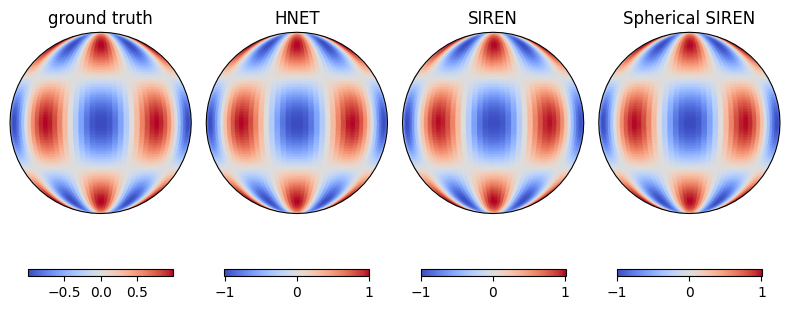

In [17]:
ypred_hnet_plot = hnet(xtrain).detach().numpy().reshape(100, 100)
ypred_siren_plot = siren(xtrain).detach().numpy().reshape(100, 100)
ypred_sh_siren_plot = sph_siren(xtrain).detach().numpy().reshape(100, 100)
ytrain_plot = ytrain.numpy().reshape(100, 100)


fig = plt.figure(figsize=(8, 4), dpi=100)

ax1 = fig.add_subplot(141, projection=ccrs.Orthographic(central_longitude=0.0, central_latitude=0.0))
im1 = ax1.imshow(ytrain_plot, extent=[0, 360, -90, 90], transform=ccrs.PlateCarree(), cmap="coolwarm")
ax1.set_title("ground truth")
fig.colorbar(im1, ax=ax1, orientation='horizontal', shrink=0.8)

ax2 = fig.add_subplot(142, projection=ccrs.Orthographic(central_longitude=0.0, central_latitude=0.0))
im2 = ax2.imshow(ypred_hnet_plot, extent=[0, 360, -90, 90], transform=ccrs.PlateCarree(), cmap="coolwarm")
ax2.set_title("HNET")
fig.colorbar(im2, ax=ax2, orientation='horizontal', shrink=0.8)

ax3 = fig.add_subplot(143, projection=ccrs.Orthographic(central_longitude=0.0, central_latitude=0.0))
im3 = ax3.imshow(ypred_siren_plot, extent=[0, 360, -90, 90], transform=ccrs.PlateCarree(), cmap="coolwarm")
ax3.set_title("SIREN")
fig.colorbar(im3, ax=ax3, orientation='horizontal', shrink=0.8)

ax4 = fig.add_subplot(144, projection=ccrs.Orthographic(central_longitude=0.0, central_latitude=0.0))
im4 = ax4.imshow(ypred_sh_siren_plot, extent=[0, 360, -90, 90], transform=ccrs.PlateCarree(), cmap="coolwarm")
ax4.set_title("Spherical SIREN")
fig.colorbar(im4, ax=ax4, orientation='horizontal', shrink=0.8)


plt.tight_layout()
plt.show()